In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install pandas

# Reading the test and train data files

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING


In [5]:
test.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.01750,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING


In [6]:
print(train.shape)
print(test.shape)

(7352, 563)
(2947, 563)


# Data Cleaning
### 1. Changing the names of colums



In [7]:
columns = train.columns

# Removing '(),-' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

## 2.Checking for dupplicate values


In [8]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 3.Checking for Null values


In [9]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 4.Checking for data imbalance
### 4.1 Check number of activites per subject / person.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

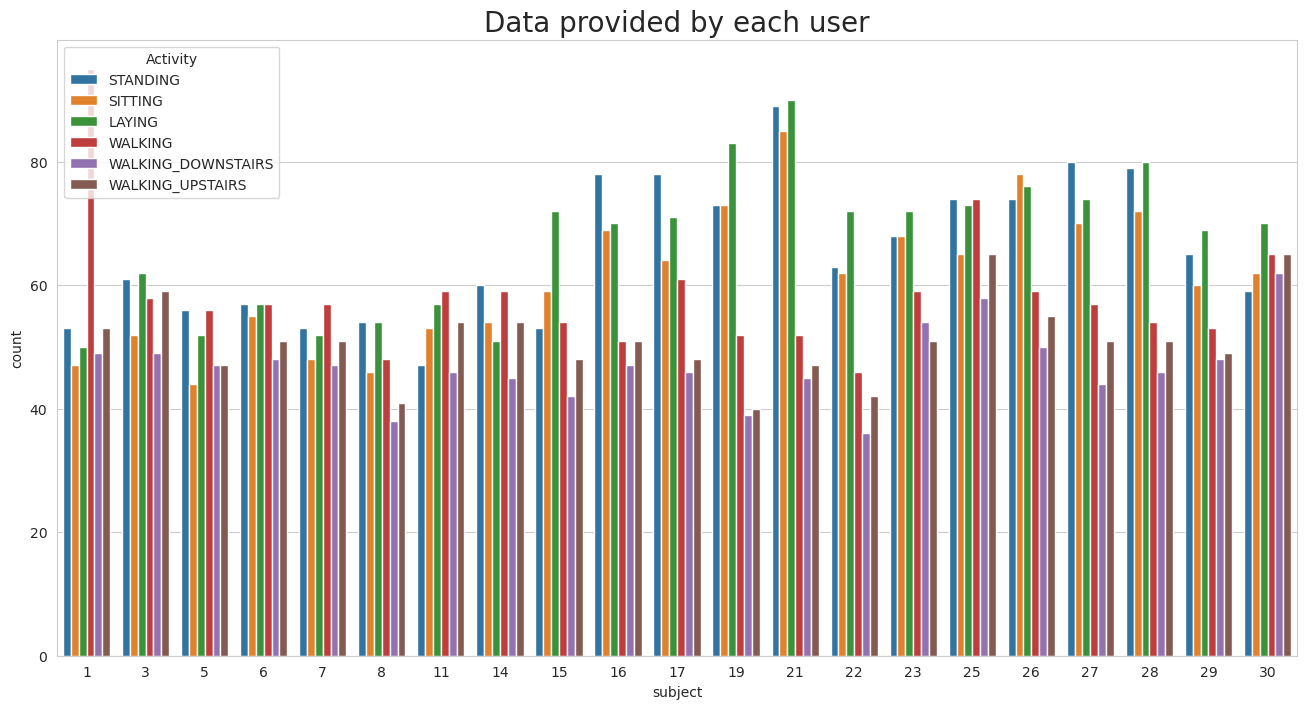

In [11]:
plt.figure(figsize=(16,8)) # set fig size
plt.title('Data provided by each user', fontsize=20) # give title
sns.countplot(x='subject',hue='Activity', data = train) # count plot gives count of each activities per subject
plt.show()

## Observations:
### Each activities are almost same for all persons.

### 4.2 Check number of data points per class

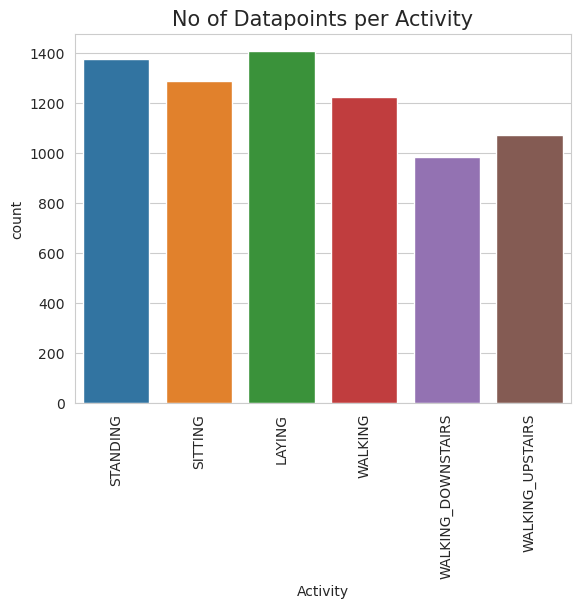

In [12]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.Activity) # count plot gives count of each activity
plt.xticks(rotation=90)
plt.show()

## Observation:
### All activities is almost balanced.

# Exploratory Data Analysis

## 1.  Static and Dynamic Activities are different
#### In static activities (sit, stand, lie down) motion information will not be very useful.
#### In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be useful.

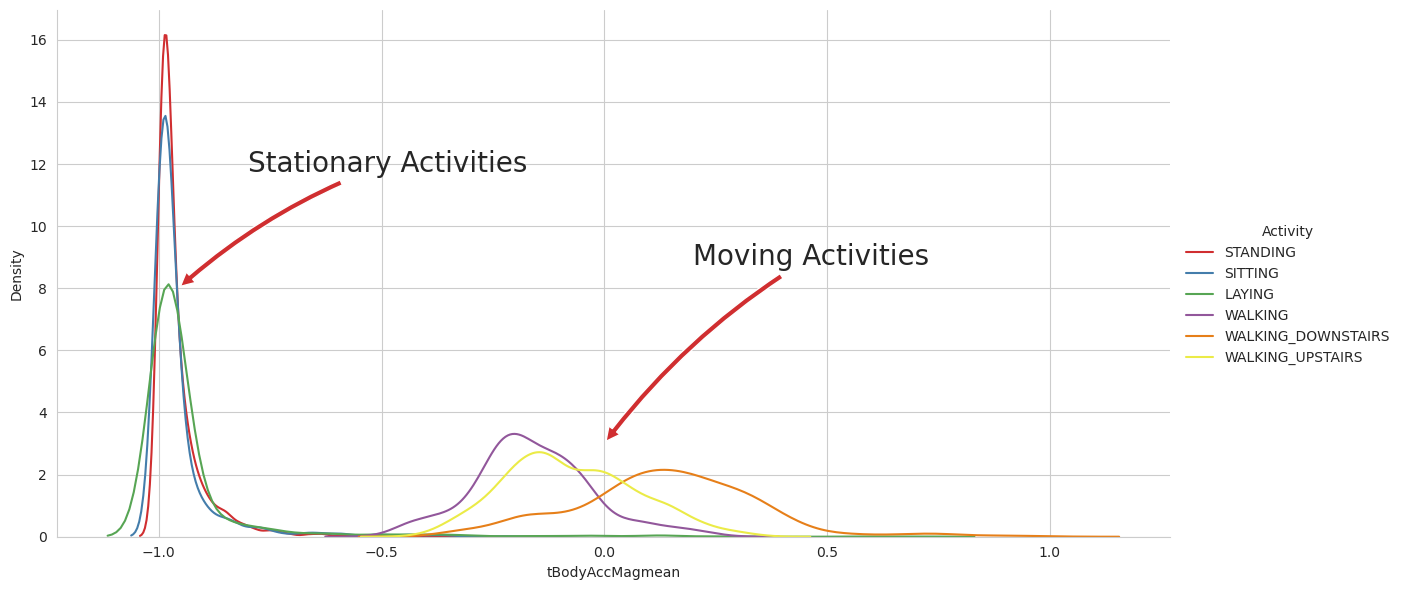

In [13]:
sns.set_palette("Set1", desat=0.80) # Set the matplotlib color cycle using a seaborn palette.
facetgrid = sns.FacetGrid(train, hue='Activity', size=6,aspect=2) # plot smooth histogram
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
def ns(x):
  return x+8.41
plt.show()

## Observation:
### From above plot we can see that for dynamic activites 'tBodyAccMagmean' features value is 
### more than -0.5. So that we can easily distinguish stationary activities and moving activities.

In [14]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [15]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']=='WALKING']
df2 = train[train['Activity']=='WALKING_UPSTAIRS']
def r(x):
  return x+4.65
df3 = train[train['Activity']=='WALKING_DOWNSTAIRS']
df4 = train[train['Activity']=='SITTING']
df5 = train[train['Activity']=='STANDING']
df6 = train[train['Activity']=='LAYING']

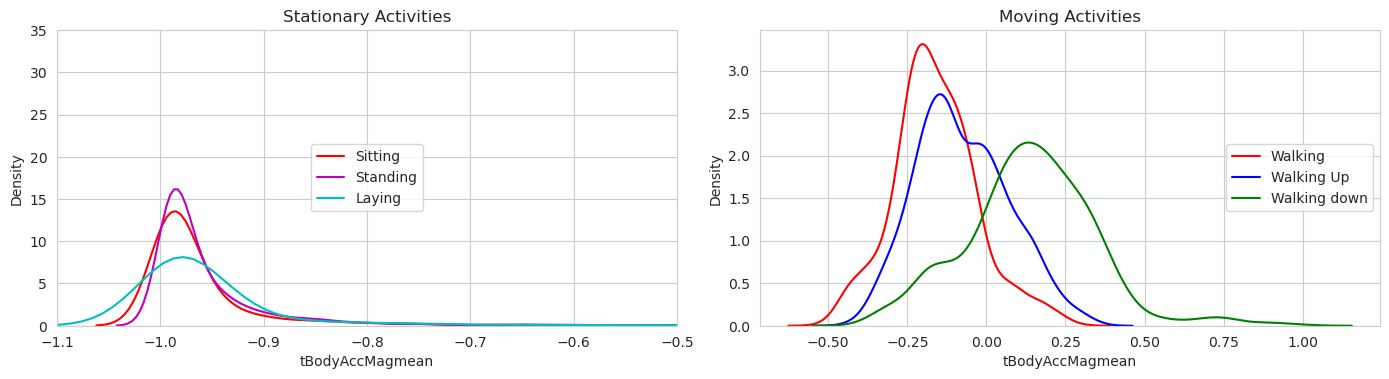

In [16]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1) # plot subplots
plt.title('Stationary Activities')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying') # plot all stationary activities
plt.axis([-1.1, -0.5, 0, 35])
plt.legend(loc='center')
def s_s(x):
  return x-0.42

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down') # plot all moving activities
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

# 2.Magnitude of an acceleration can saperate it well

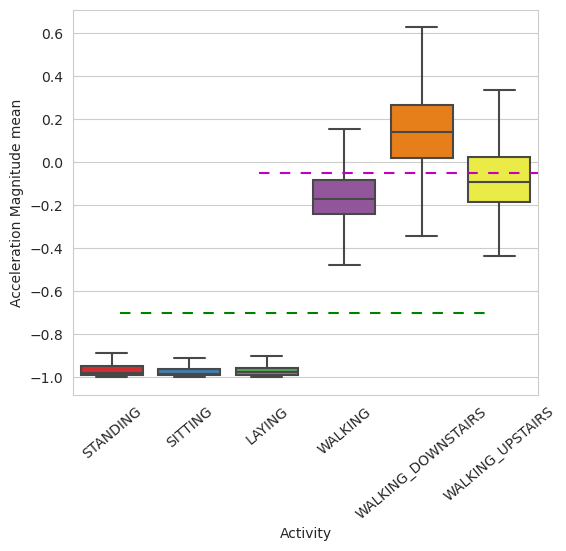

In [17]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
def g(x):
  return x+0.3
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=40)
plt.show()

## Observations:
### If tAccMagnitudeMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
### If tAccMagnitudeMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
### If tAccMagnitudeMean > 0.0 then the Activity is WalkingDownstairs.
### We can classify 75% the Acitivity labels with some errors.

## Position of GravityAcceleration Components also matters


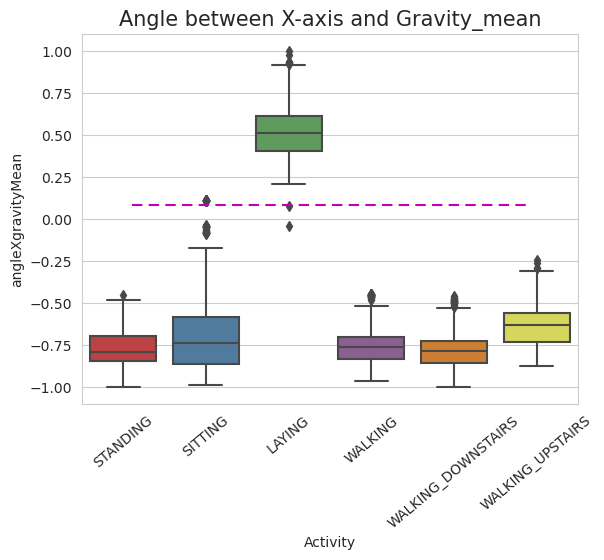

In [18]:
sns.boxplot(x='Activity', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

## Observations:
### If angleX,gravityMean > 0 then Activity is Laying.
### We can classify all datapoints belonging to Laying activity with just a single if else statement

# Dimensionality Reduction
### We have total 564 features, we could not able to analyze all the features through EDA.

### By applying dimensionality reduction technique we can analyze all the features.





# Apply T-SNE on the data
### T - SNE is used for dimensionality reduction. 
### Here we are converting 564 dimensions into 2 dimensions. So that we can easily analyze the data.
### t-Distributed Stochastic Neighbor Embedding

In [19]:
from sklearn.manifold import TSNE

In [20]:
# performs t-sne with different perplexity values and their repective plots..
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.009s...
[t-SNE] Computed neighbors for 7352 samples in 2.460s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597464
[t-SNE] Computed conditional probabilities in 0.046s
[t-SNE] Iteration 50: error = 124.8207321, gradient norm = 0.0254527 (50 iterations in 3.107s)
[t-SNE] Iteration 100: error = 107.0017166, gradient norm = 0.0273571 (50 iterations in 

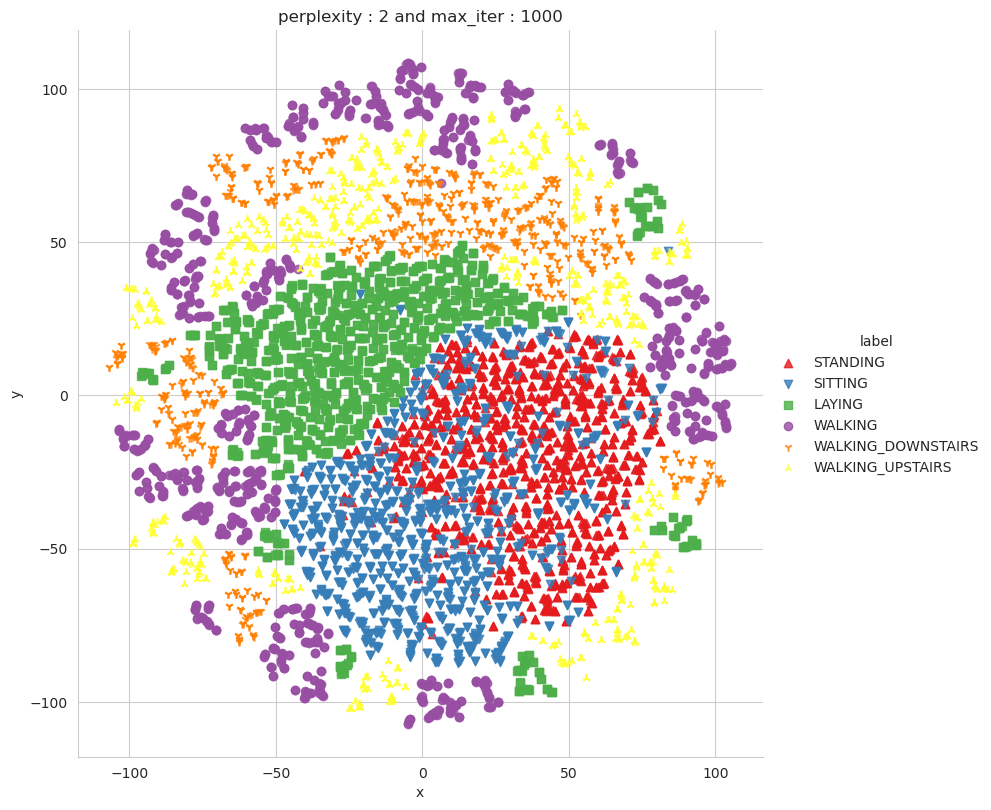

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...
[t-SNE] Computed neighbors for 7352 samples in 2.309s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.063s
[t-SNE] Iteration 50: error = 114.0855560, gradient norm = 0.0196239 (50 iterations in 2.631s)
[t-SNE] Iteration 100: error = 98.1358795, gradient norm = 0.0158667 (50 iteration

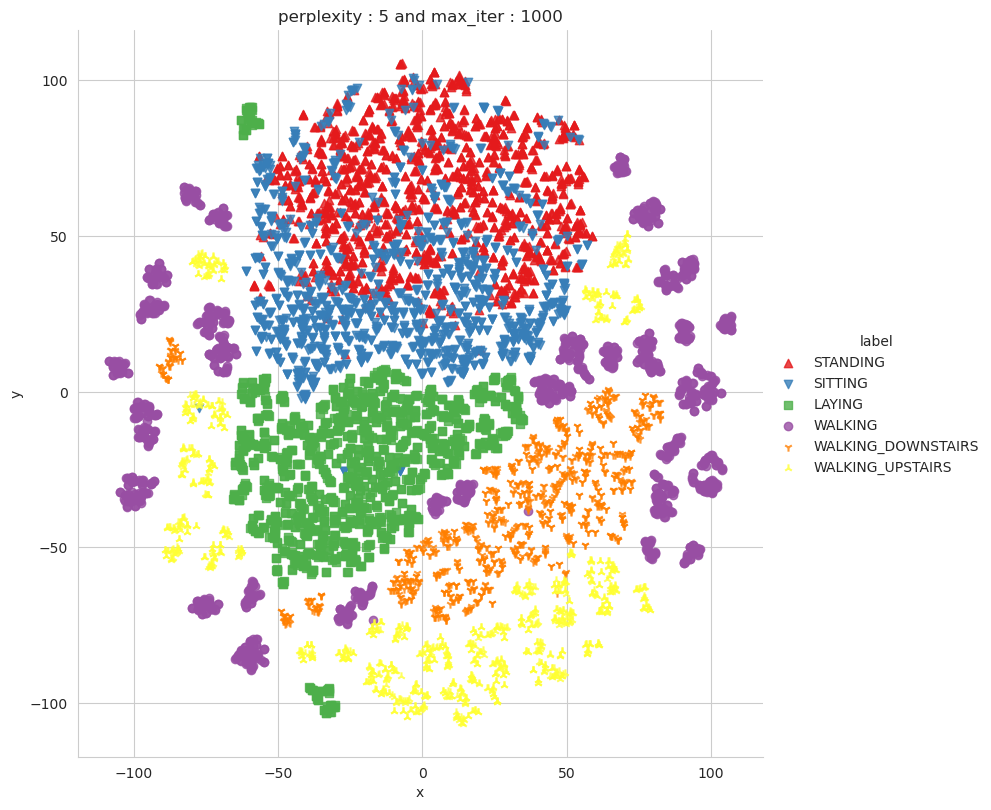

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.009s...
[t-SNE] Computed neighbors for 7352 samples in 2.431s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.102s
[t-SNE] Iteration 50: error = 105.7249451, gradient norm = 0.0191049 (50 iterations in 3.203s)
[t-SNE] Iteration 100: error = 90.4210968, gradient norm = 0.0091595 (50 iteratio

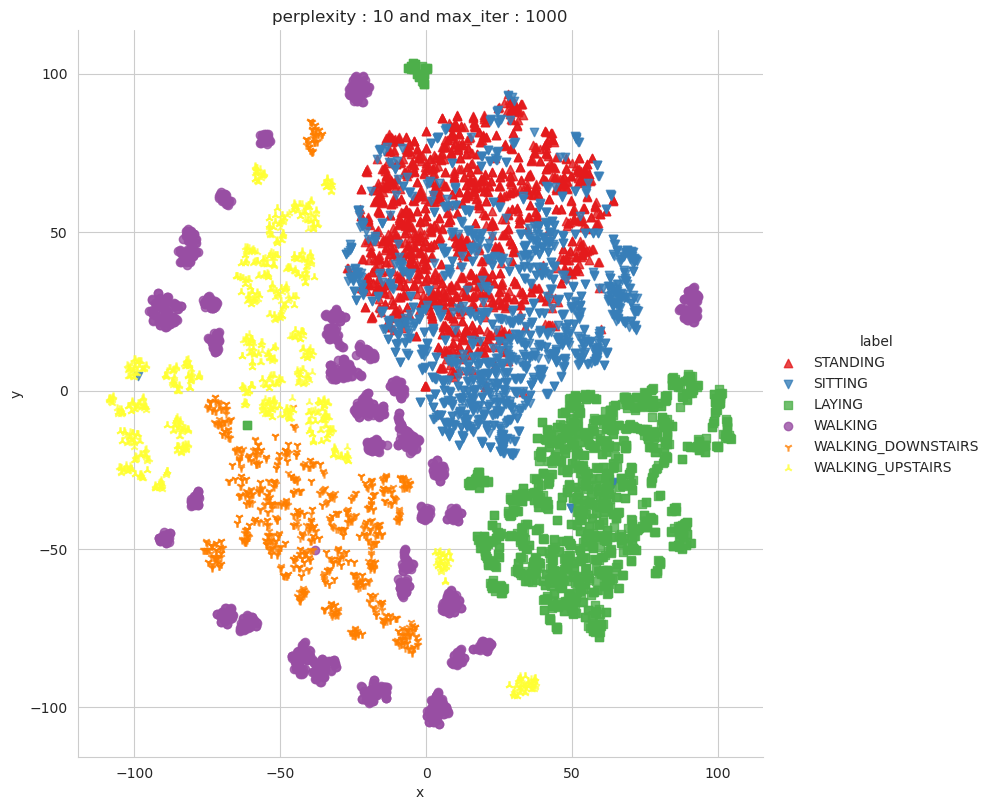

Done


In [21]:
#We have added subject column for EDA only, it will not be useful for tsne, drop it.
#we are applying tsne on activity. Use activity as a y label.

X_pre_tsne = train.drop(['subject','Activity'], axis=1)
y_pre_tsne = train['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10])

## Observations:
### From above plot we can clearly distinguish all the activities, 
### excluding standing and sitting. These two activities are overlapping with each other.

# Make a model ready

In [22]:
# get X_test and y_test from train csv file
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train.Activity

In [23]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity

In [24]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))

print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))


X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Building the model using Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [26]:
y_predict=lr.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy=accuracy_score(y_test,y_predict)
cr=classification_report(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)
print('accuracy: {}\n\n\nclassification report for logistic regression:\n {}\n\n\nconfusion matrix:\n {}'.format(accuracy*100,cr,cm))

accuracy: 95.82626399728538


classification report for logistic regression:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



confusion matrix:
 [[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  17 515   0   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 403  13]
 [  0   0   0  25   1 445]]


Confusion matrix:
[[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  17 515   0   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 403  13]
 [  0   0   0  25   1 445]]


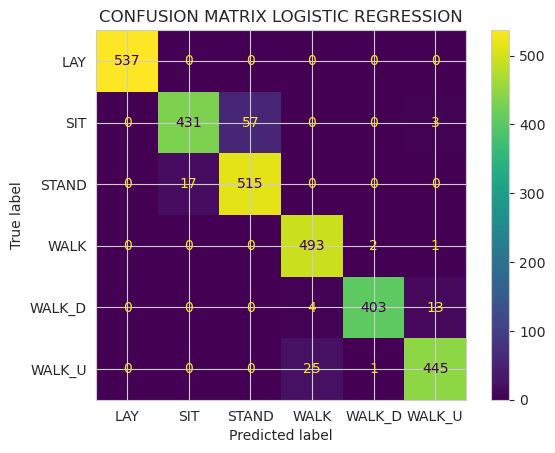

In [28]:
import pylab as pl
cm=metrics.confusion_matrix(y_test,y_predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['LAY', 'SIT','STAND','WALK','WALK_D','WALK_U'])
print('Confusion matrix:')
print(cm)
cm_display.plot()
plt.title("CONFUSION MATRIX LOGISTIC REGRESSION")
plt.show()

# Building the model using Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

dt=RandomForestClassifier()
dt.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_predict=dt.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy=accuracy_score(y_test,y_predict)
cr=classification_report(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)

print('accuracy: {}\n\n\nclassification report:\n {}\n\n\nconfusion matrix:\n {}'.format(accuracy*100,cr,cm))

accuracy: 92.90804207668816


classification report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.88      0.90       491
          STANDING       0.89      0.92      0.91       532
           WALKING       0.91      0.97      0.94       496
WALKING_DOWNSTAIRS       0.96      0.86      0.91       420
  WALKING_UPSTAIRS       0.90      0.92      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



confusion matrix:
 [[537   0   0   0   0   0]
 [  0 433  58   0   0   0]
 [  0  40 492   0   0   0]
 [  0   0   0 481  10   5]
 [  0   0   0  17 362  41]
 [  0   0   0  32   6 433]]


Confusion matrix:
[[537   0   0   0   0   0]
 [  0 433  58   0   0   0]
 [  0  40 492   0   0   0]
 [  0   0   0 481  10   5]
 [  0   0   0  17 362  41]
 [  0   0   0  32   6 433]]


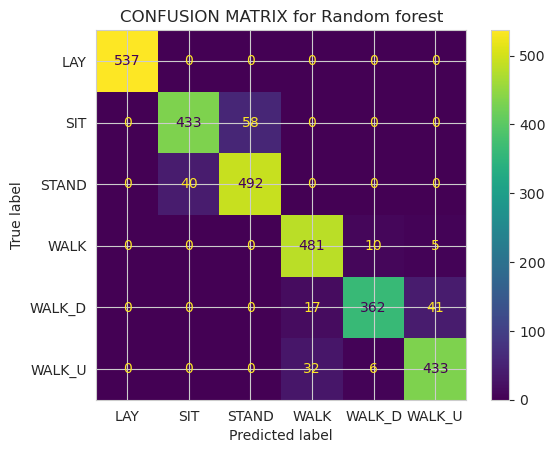

In [32]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['LAY', 'SIT','STAND','WALK','WALK_D','WALK_U'])
print('Confusion matrix:')
cm_display.plot()
print(cm)
plt.title("CONFUSION MATRIX for Random forest")
plt.show()

# Building the model using Naive bayes

In [33]:
from sklearn.tree import DecisionTreeClassifier as GaussianNB
dt = GaussianNB()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
y_predict=dt.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy=accuracy_score(y_test,y_predict)
cr=classification_report(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)
print('accuracy: {}\n\n\nclassification report:\n {}\n\n\nconfusion matrix:\n {}'.format(accuracy*100,cr,cm))

accuracy: 86.25721072276892


classification report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.84      0.76      0.80       491
          STANDING       0.80      0.86      0.83       532
           WALKING       0.84      0.92      0.88       496
WALKING_DOWNSTAIRS       0.87      0.83      0.85       420
  WALKING_UPSTAIRS       0.83      0.78      0.80       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



confusion matrix:
 [[537   0   0   0   0   0]
 [  0 373 118   0   0   0]
 [  0  73 459   0   0   0]
 [  0   0   0 458  17  21]
 [  0   0   0  19 349  52]
 [  0   0   0  68  37 366]]


Confusion matrix:
[[537   0   0   0   0   0]
 [  0 373 118   0   0   0]
 [  0  73 459   0   0   0]
 [  0   0   0 458  17  21]
 [  0   0   0  19 349  52]
 [  0   0   0  68  37 366]]


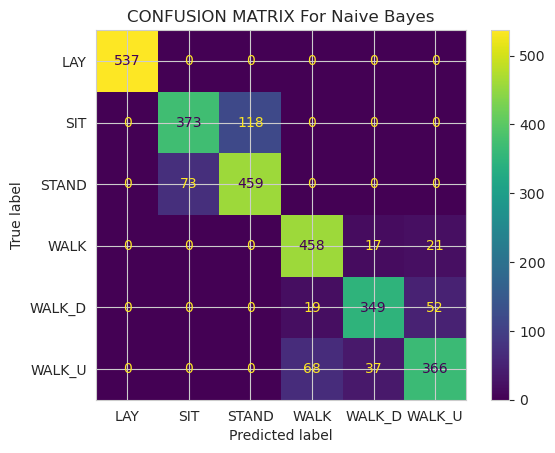

In [36]:
from sklearn import metrics
import pylab as pl
cm=metrics.confusion_matrix(y_test,y_predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['LAY', 'SIT','STAND','WALK','WALK_D','WALK_U'])
print('Confusion matrix:')
print(cm)
cm_display.plot()
plt.title("CONFUSION MATRIX For Naive Bayes")
plt.show()

# Building the model using Support Vector Machine

In [37]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)

SVC()

In [38]:
y_predict=svm.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy=accuracy_score(y_test,y_predict)
cr=classification_report(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)
print('accuracy: {}\n\n\nclassification report:\n {}\n\n\nconfusion matrix:\n {}'.format(accuracy*100,cr,cm))

accuracy: 95.04580929759076


classification report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.89      0.91       491
          STANDING       0.91      0.95      0.93       532
           WALKING       0.94      0.98      0.96       496
WALKING_DOWNSTAIRS       0.99      0.91      0.95       420
  WALKING_UPSTAIRS       0.93      0.96      0.94       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



confusion matrix:
 [[537   0   0   0   0   0]
 [  0 438  51   0   0   2]
 [  0  29 503   0   0   0]
 [  0   0   0 488   3   5]
 [  0   0   0  10 384  26]
 [  0   0   0  20   0 451]]


Confusion matrix:
[[537   0   0   0   0   0]
 [  0 438  51   0   0   2]
 [  0  29 503   0   0   0]
 [  0   0   0 488   3   5]
 [  0   0   0  10 384  26]
 [  0   0   0  20   0 451]]


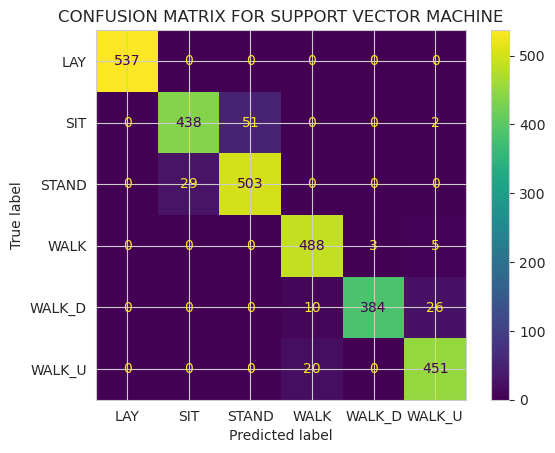

In [40]:
from sklearn import metrics
import pylab as pl
cm=metrics.confusion_matrix(y_test,y_predict)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['LAY', 'SIT','STAND','WALK','WALK_D','WALK_U'])
print('Confusion matrix:')
print(cm)
cm_display.plot()
plt.title("CONFUSION MATRIX FOR SUPPORT VECTOR MACHINE")
plt.show()

In [41]:
lg_acc=95.82626399728538
nb_acc=85.40889039701392
rf_acc=92.39904988123516
svm_acc=95.04580929759076

# Ploting the graphs comparing each model accuracy

In [42]:
import numpy as np
import matplotlib.pyplot as plt

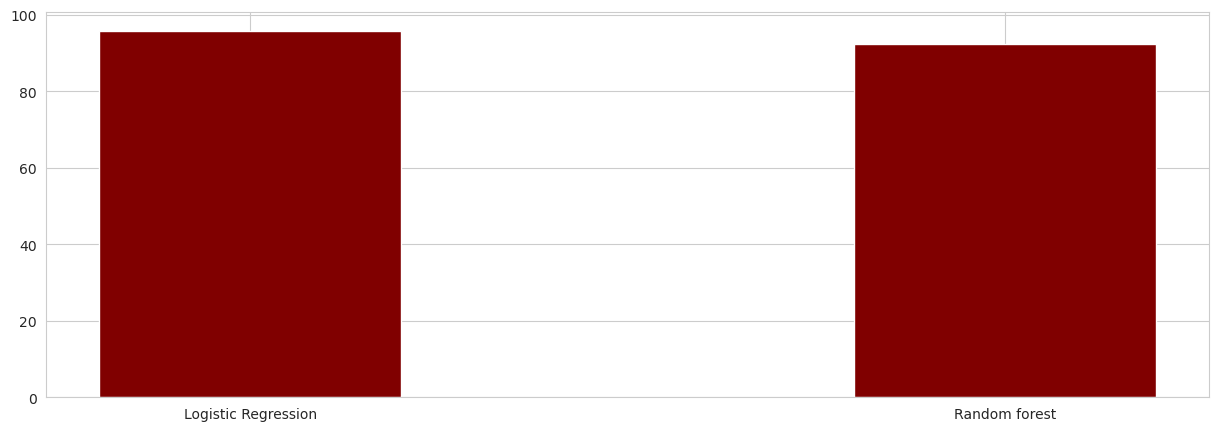

In [43]:
ac = [lg_acc,rf_acc]
fig = plt.figure(figsize = (15, 5))
x = ['Logistic Regression', 'Random forest']
plt.bar(x, ac, color ='maroon',width = 0.4)
plt.show()

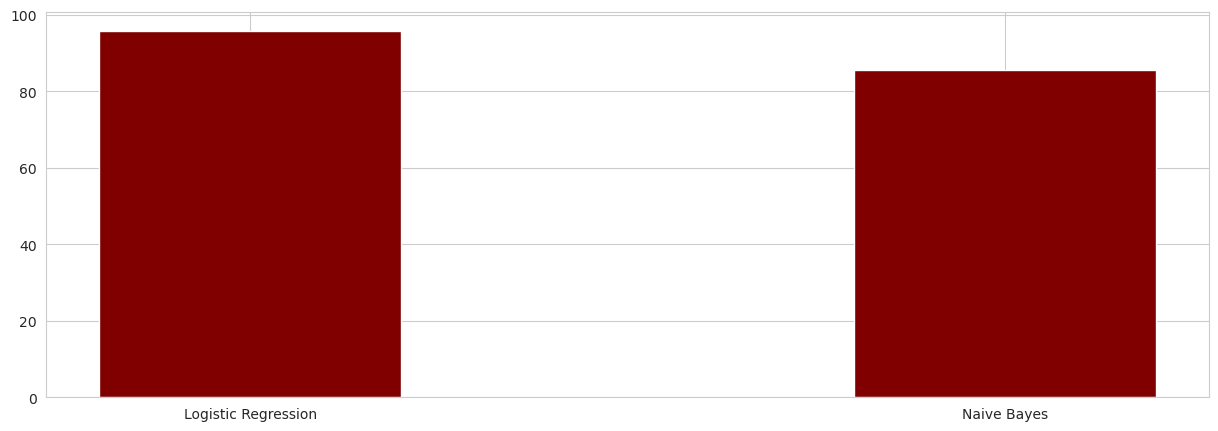

In [44]:
ac = [lg_acc,nb_acc]
fig = plt.figure(figsize = (15,5))
x = ['Logistic Regression', 'Naive Bayes']
plt.bar(x, ac, color ='maroon',width = 0.4)
plt.show()

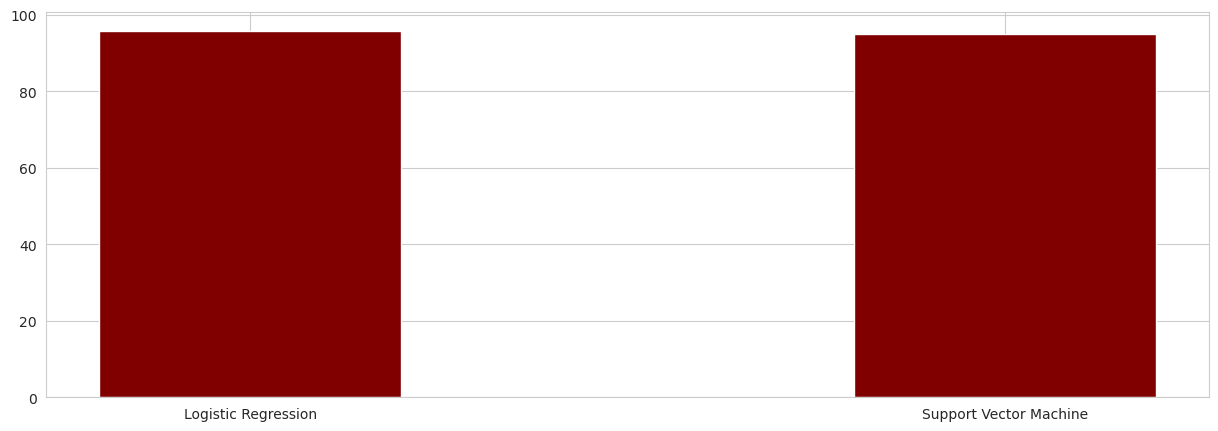

In [45]:
ac = [lg_acc,svm_acc]
fig = plt.figure(figsize = (15, 5))
x = ['Logistic Regression', 'Support Vector Machine']
plt.bar(x, ac, color ='maroon',width = 0.4)
plt.show()